<h1><center>Online Shoppers Purchasing Intention</center></h1>

**Business Task:** The present analytics notebook aims to analyze and predict the human behavior of the
consumers in online shopping. 

**Dataset Information:**
The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

**Attribute Information:**
Numerical features
1. Administrative: Number of pages visited by the visitor about account management 
2. Administrative duration: Total amount of time (in seconds) spent by the visitor on account management related pages
3. Informational: Number of pages visited by the visitor about Web site, communication and address information of the shopping site
4. Informational duration: Total amount of time (in seconds) spent by the visitor on informational pages 
5. Product related: Number of pages visited by visitor about product related pages 
6. Product related duration: Total amount of time (in seconds) spent by the visitor on product related pages 
7. Bounce rate Average bounce rate value of the pages visited by the visitor 
8. Exit rate Average exit rate value of the pages visited by the visitor 
9. Page value Average page value of the pages visited by the visitor 
10. Special day Closeness of the site visiting time to a special day 

Categorical Features
1. OperatingSystems: Operating system of the visitor
2. Browser: Browser of the visitor 
3. Region: Geographic region from which the session has been started by the visitor 
4. TrafficType: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)
5. VisitorType: Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’
6. Weekend: Boolean value indicating whether the date of the visit is weekend 
7. Month: Month value of the visit date 
8. Revenue: Class label indicating whether the visit has been finalized with a transaction

Dataset link: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset


#### https://support.google.com/analytics/answer/2525491?hl=en

In [43]:
#data manipulation libraries
import numpy as np
import pandas as pd

#plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Matplotlib figure default configuartions
# plt.rcParams['figure.figsize'] = (15, 7)
title_fontsize = 20
label_fontsize = 15
plt.rcParams['font.size'] = 15

#sklearn data preparation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler

#sklearn classification libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#keras libraries for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#SMOTE import for class balancing
from imblearn.over_sampling import SMOTE

### Data Understanding

In [2]:
#importing the dataset
dataset= pd.read_csv('data.csv',header=0,encoding='unicode_escape')

#displaying the first 5 elements of the dataset
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
#displaying the rows and columns of the dataset
dataset.shape

(12330, 18)

In [7]:
#describing the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [90]:
#displaying the information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [91]:
#checking the number of null values
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

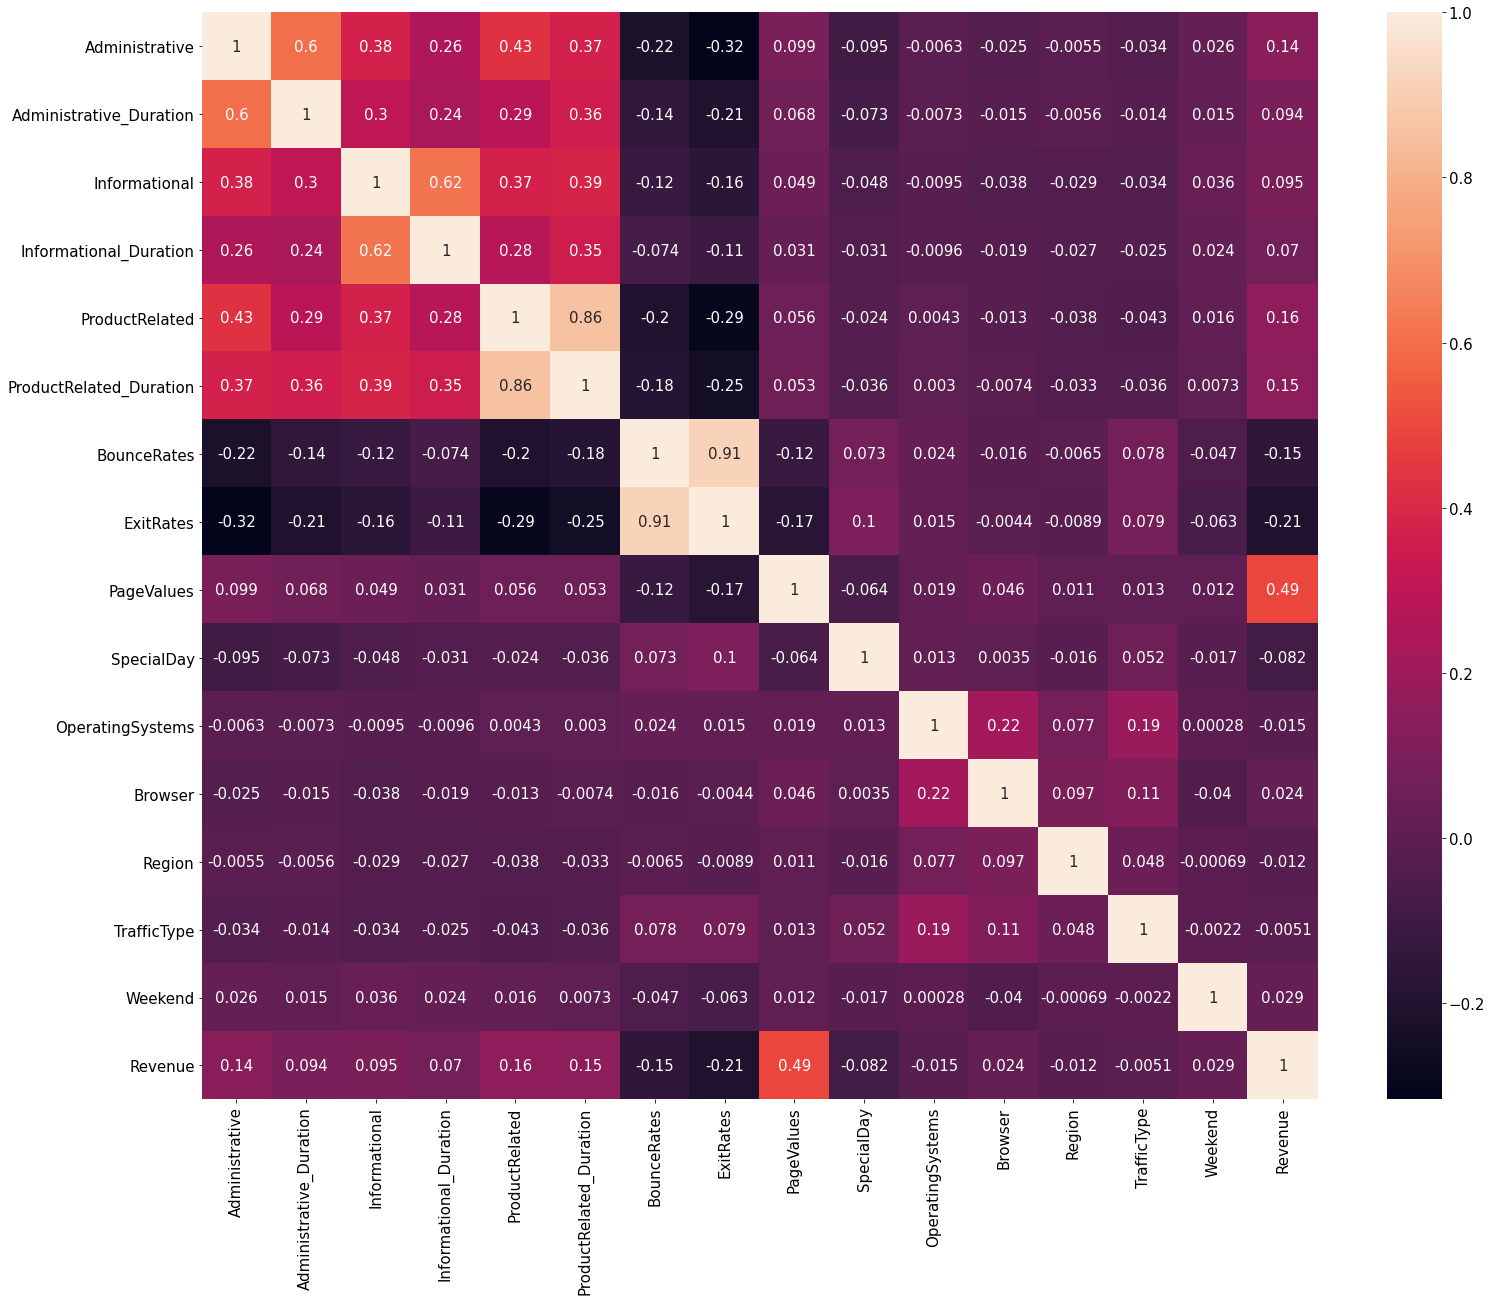

In [61]:
# sns.heatmap(dataset.drop(['VisitorType','Month'], axis=1))
plt.figure(figsize = (25,20))
sns.heatmap(dataset.corr(), annot=True)

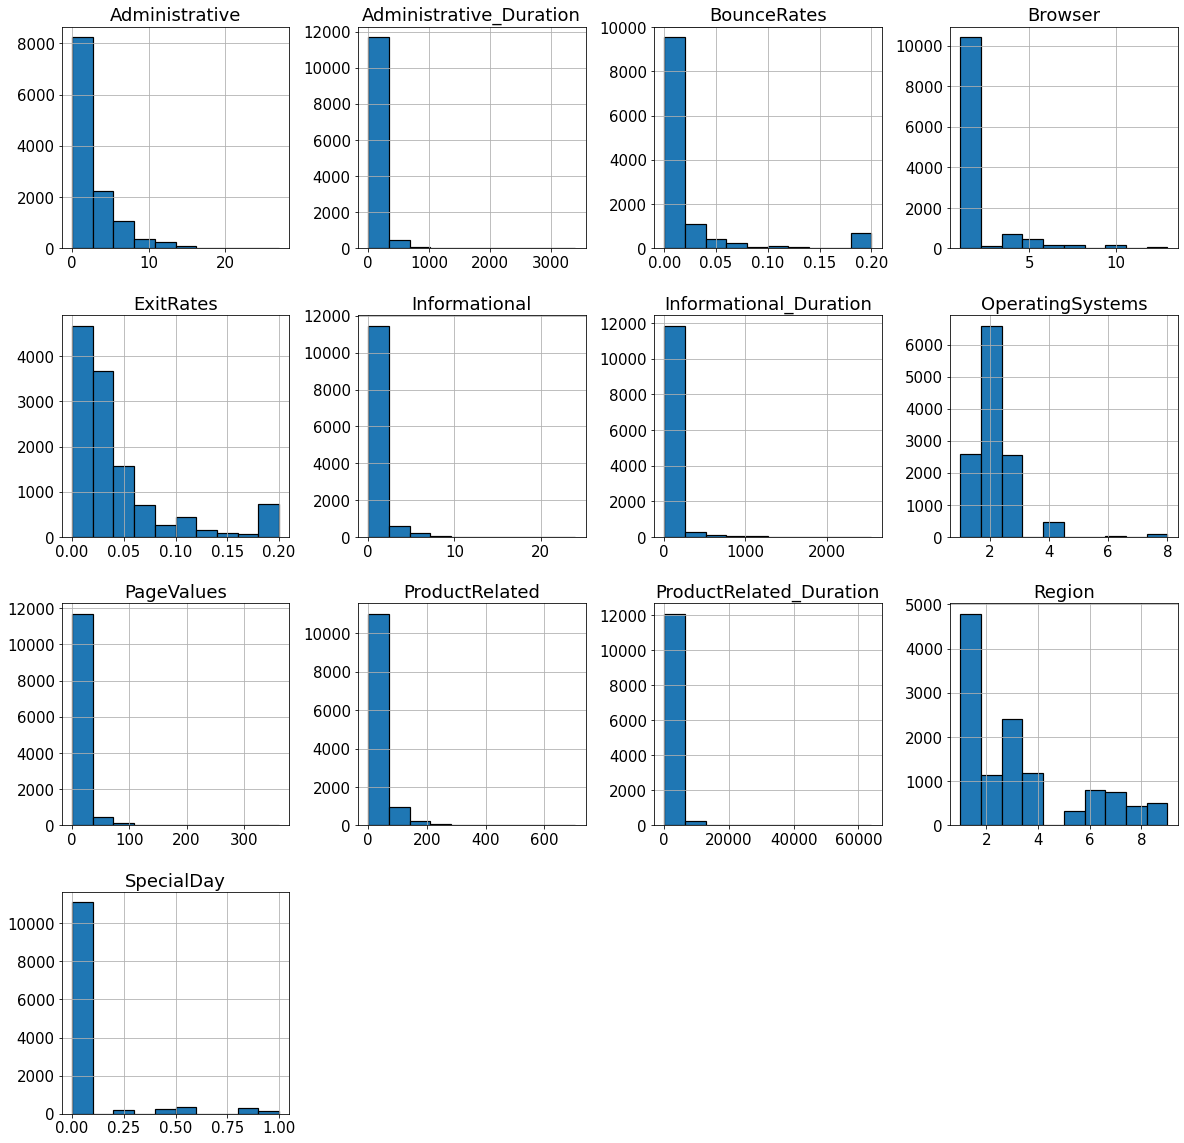

In [74]:
num_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region']
dataset[num_cols].hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

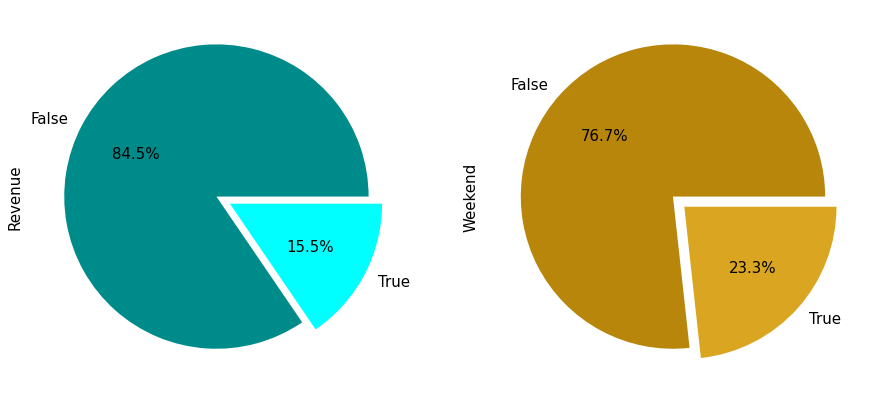

In [83]:
#plotting the contribution of customers to the company
fig,ax = plt.subplots(1,2)
explode = [0, 0.1]
dataset.Revenue.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0],colors = ['darkcyan','cyan'],explode = explode);
dataset.Weekend.value_counts().plot.pie(autopct="%.1f%%",ax = ax[1],colors = ['darkgoldenrod','goldenrod'],explode = explode);

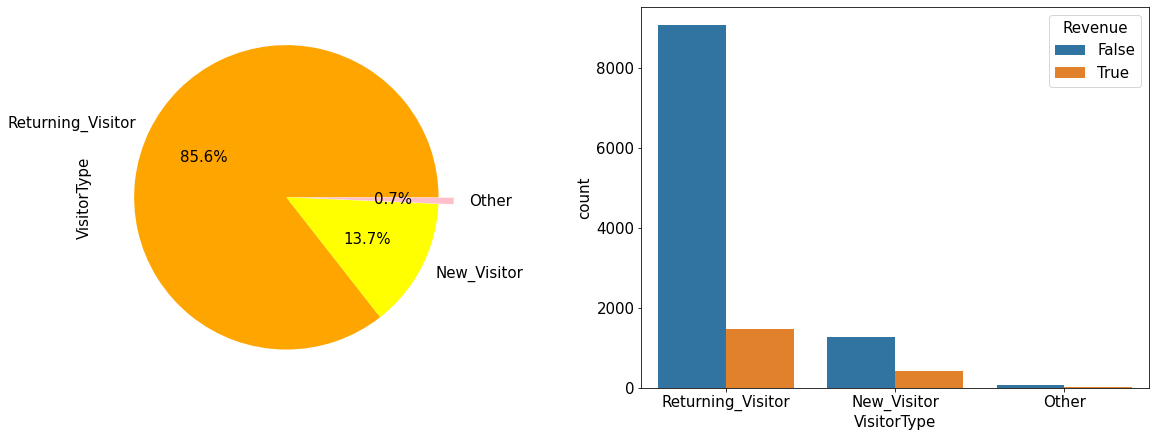

In [91]:
#displaying customer type and their count
fig,ax = plt.subplots(1,2,figsize = (20,7))

explode = [0, 0, 0.1]
dataset.VisitorType.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0],colors = colors,explode = explode);
sns.countplot(x="VisitorType",data=dataset,hue="Revenue",ax = ax[1])

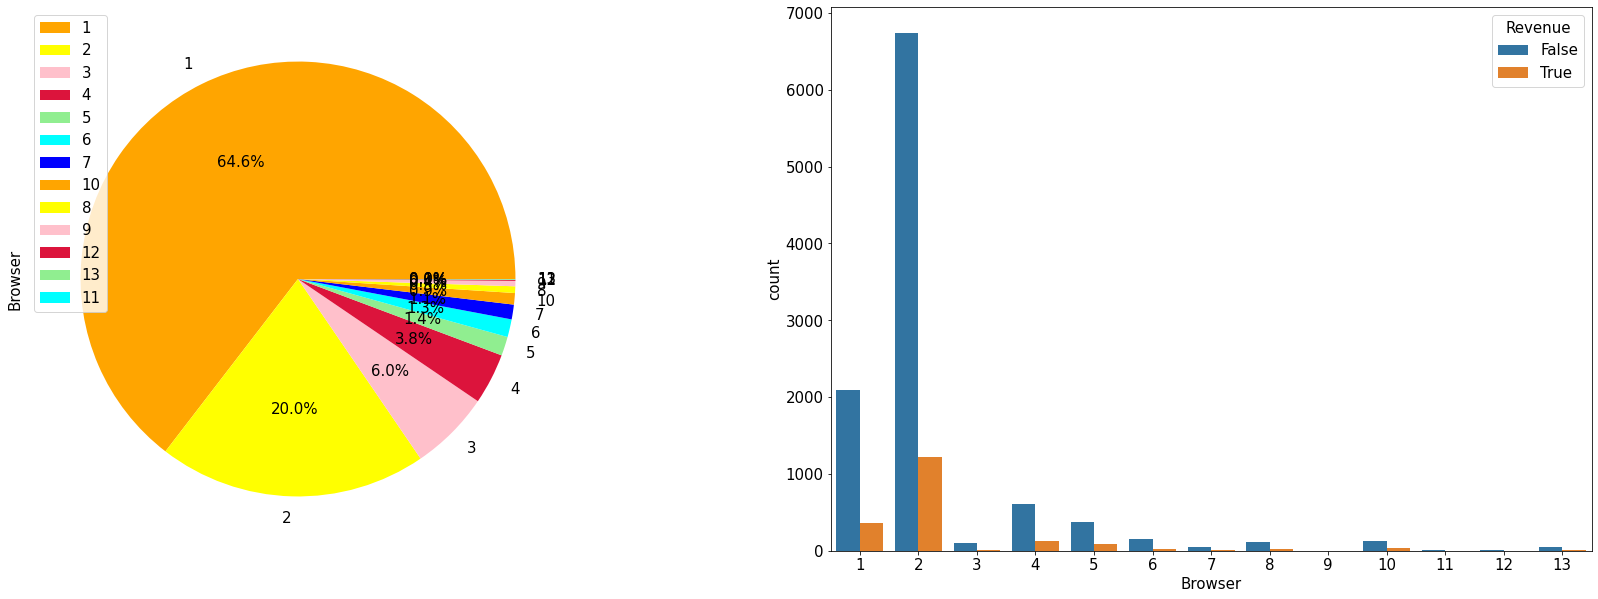

In [107]:
fig,ax = plt.subplots(1,2,figsize = (30,10))
labels = dataset.Browser.unique()
dataset.Browser.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0],colors = colors,labels = legend)
ax[0].legend()
sns.countplot(x="Browser",data=dataset,hue="Revenue",ax = ax[1])


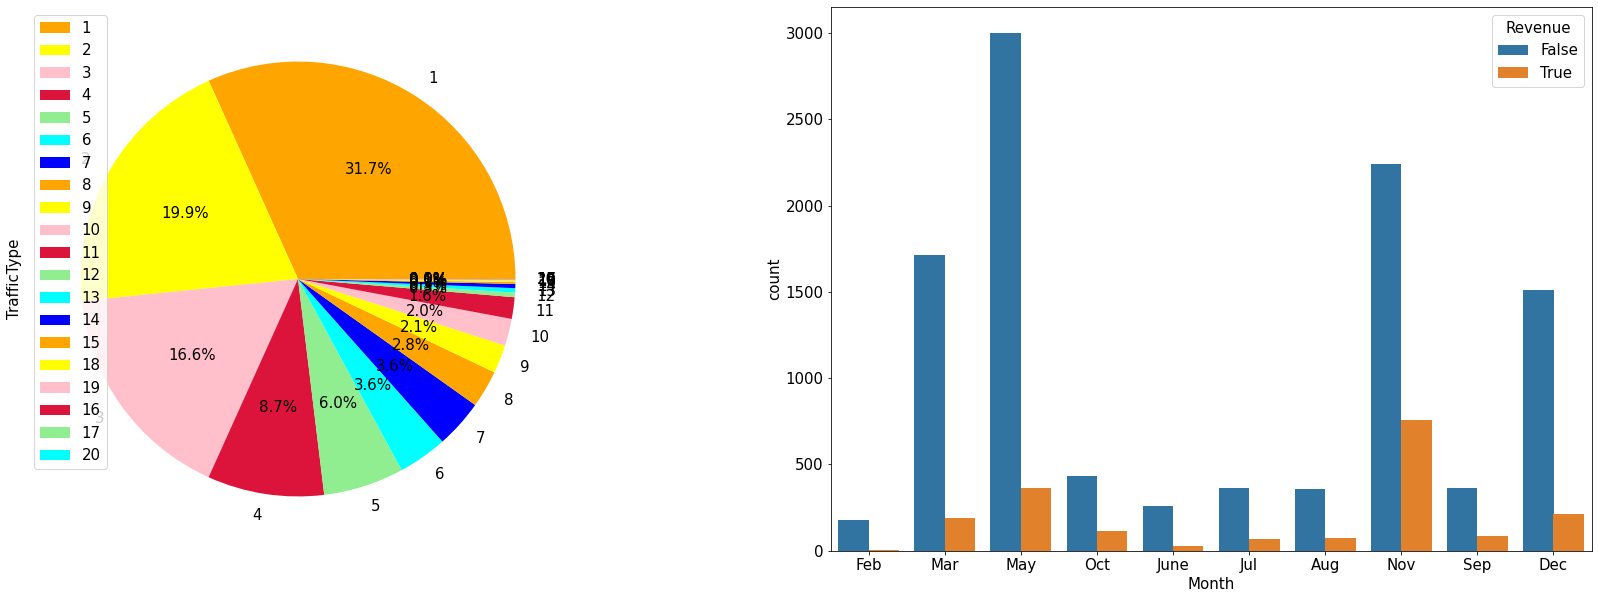

In [126]:
fig,ax = plt.subplots(1,2,figsize = (30,10))
labels = dataset.Month.unique()
dataset.Month.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0],colors = colors, labels = labels);
ax[0].legend()
sns.countplot(x="Month",data=dataset,hue="Revenue",ax = ax[1])

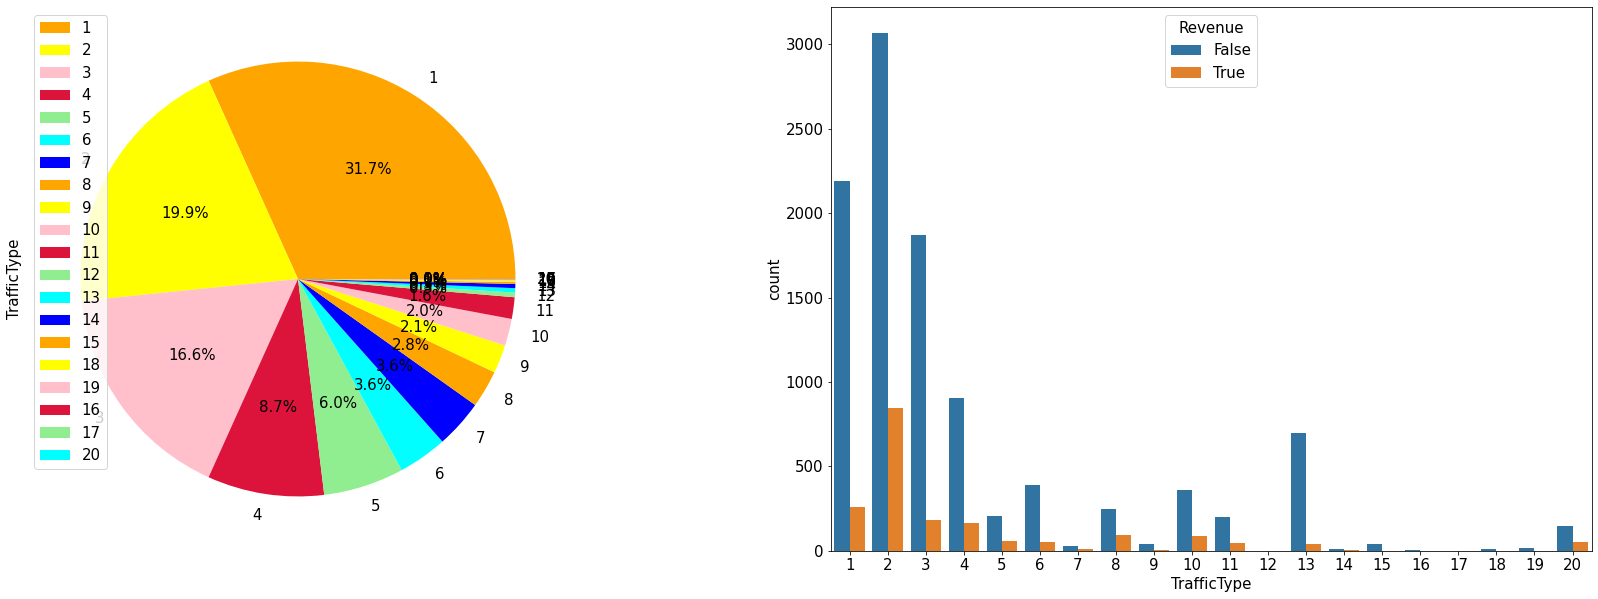

In [127]:
fig,ax = plt.subplots(1,2,figsize = (30,10))
labels = dataset.TrafficType.unique()
dataset.TrafficType.value_counts().plot.pie(autopct="%.1f%%",ax = ax[0],colors = colors, labels = labels);
ax[0].legend()
sns.countplot(x="TrafficType",data=dataset,hue="Revenue",ax = ax[1])

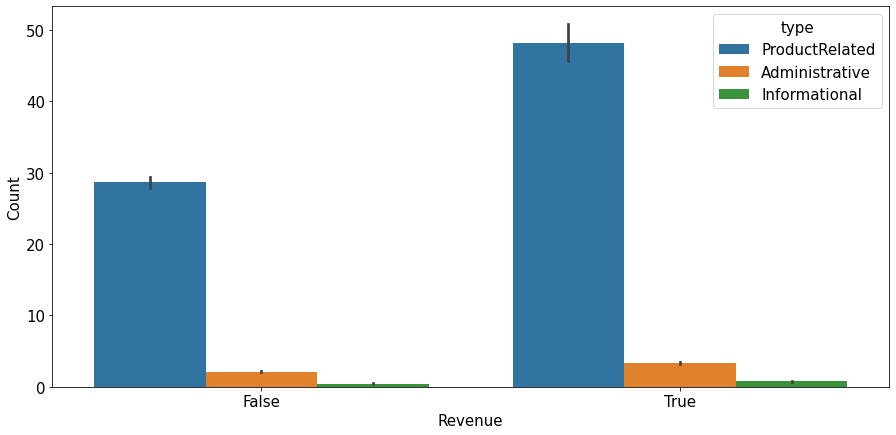

In [39]:
#displaying the count for productrelated,administrative and informational based on revenue
df2 = pd.melt(dataset[['ProductRelated','Administrative','Informational','Revenue']], id_vars='Revenue', var_name="type", value_name="Count")
df2
# sns.factorplot(x='Revenue', y='Count', hue='type', data=df2, kind='bar')
sns.barplot(x='Revenue', y='Count', hue='type', data=df2)

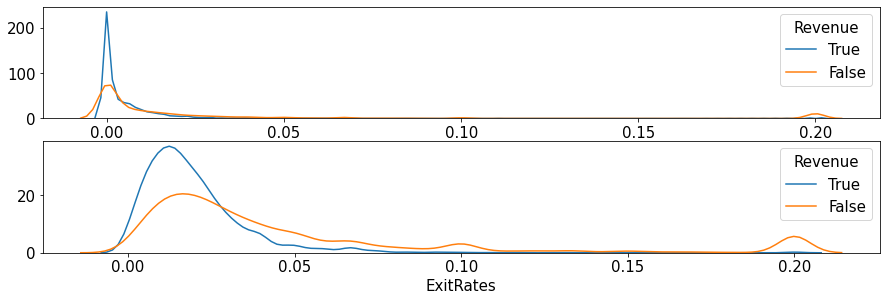

In [36]:
#displaying count of bouncerate and exitrate based on revnue

ax1 = plt.subplot(311)
sns.kdeplot(dataset[dataset.Revenue == True].BounceRates)
sns.kdeplot(dataset[dataset.Revenue == False].BounceRates)
plt.xlabel('BounceRates')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])

ax2 = plt.subplot(312)
sns.kdeplot(dataset[dataset.Revenue == True].ExitRates)
sns.kdeplot(dataset[dataset.Revenue == False].ExitRates)
plt.xlabel('ExitRates')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])
plt.show()


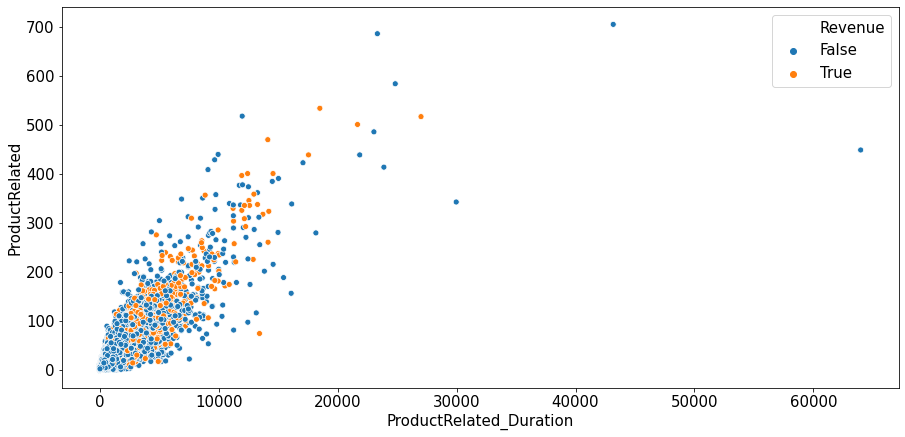

In [119]:
sns.scatterplot(x = "ProductRelated_Duration",y = "ProductRelated",hue = 'Revenue',data = dataset)

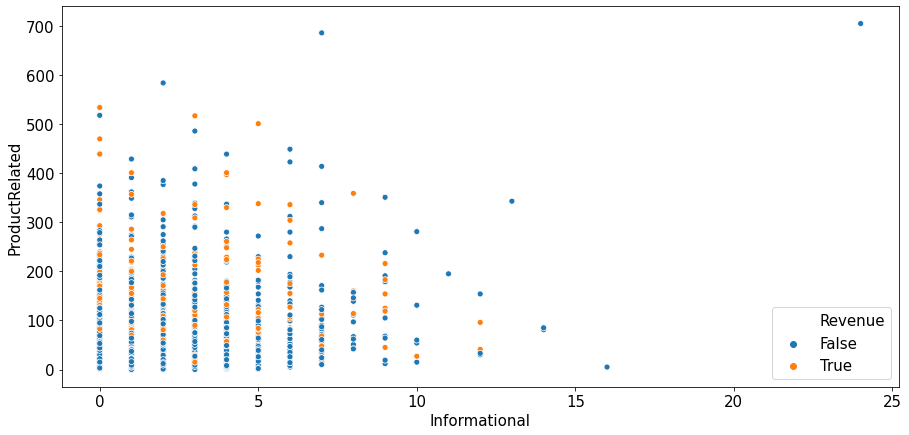

In [121]:
sns.scatterplot(x = "Informational",y = "ProductRelated",hue = 'Revenue',data = dataset)

### Data Preparation

In [3]:
categorical_features = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
#        'Weekend', 'Revenue']

In [4]:
preprocessed_dataset = pd.get_dummies(data=dataset, columns=categorical_features)

In [5]:
scaler = MinMaxScaler()
columns = preprocessed_dataset.columns
preprocessed_dataset = pd.DataFrame(scaler.fit_transform(preprocessed_dataset),columns = columns)

In [44]:
X = preprocessed_dataset.loc[:, preprocessed_dataset.columns != 'Revenue']
y = preprocessed_dataset.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [31]:
logistic = LogisticRegression(solver='liblinear', penalty='l1').fit(X_train, y_train)

In [65]:
def evalution(y,y_pred):
#     y_pred = model.predict(X)

    print(f"CONFUSION MATRIX:\n")
    #Plot confusion matrix
    cm = pd.DataFrame(confusion_matrix(y,y_pred))
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size
    plt.xlabel("Predicted label")
    plt.ylabel("Actual Label")
    plt.show()

#     plot_confusion_matrix(model, X_test, y_test)
    print(f"ACCURACY SCORE:\n{accuracy_score(y, y_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{classification_report(y, y_pred)}")

CONFUSION MATRIX:



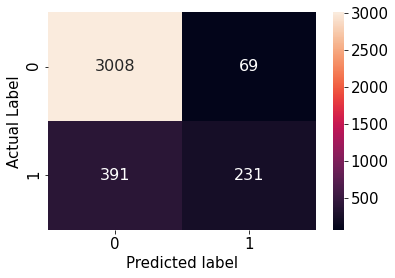

ACCURACY SCORE:
0.8756
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3077
         1.0       0.77      0.37      0.50       622

    accuracy                           0.88      3699
   macro avg       0.83      0.67      0.72      3699
weighted avg       0.87      0.88      0.86      3699



In [64]:
evalution(logistic,X_test,y_test)

      0    1
0  2884  193
1   515  107
ACCURACY SCORE:
0.8086
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      3077
         1.0       0.36      0.17      0.23       622

    accuracy                           0.81      3699
   macro avg       0.60      0.55      0.56      3699
weighted avg       0.77      0.81      0.78      3699



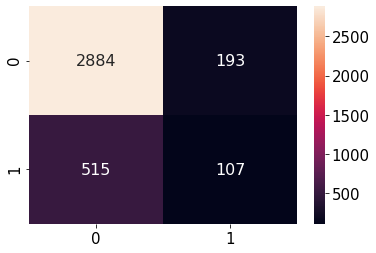

In [55]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
evalution(knn,X_test,y_test)

Epoch 1/20
68/68 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.8162
Epoch 2/20
68/68 [==============================] - 0s 3ms/step - loss: 0.4086 - accuracy: 0.8510
Epoch 3/20
68/68 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8510
Epoch 4/20
68/68 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8510
Epoch 5/20
68/68 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8510: 0s - loss: 0.3672 - accuracy: 0.
Epoch 6/20
68/68 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8510
Epoch 7/20
68/68 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8511
Epoch 8/20
68/68 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8518
Epoch 9/20
68/68 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8539
Epoch 10/20
68/68 [==============================] - 0s 2ms/step - loss: 0.3288 - ac

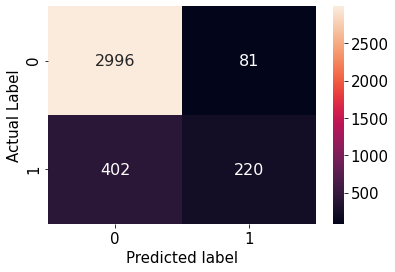

ACCURACY SCORE:
0.8694
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93      3077
         1.0       0.73      0.35      0.48       622

    accuracy                           0.87      3699
   macro avg       0.81      0.66      0.70      3699
weighted avg       0.86      0.87      0.85      3699



In [68]:
model = Sequential()
model.add(Dense(12, activation='relu', autocast = False))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128)
y_pred = np.where(model.predict(X_test)>0.5, 1, 0)
evalution(y_test,y_pred)

### Lets use SMOTE to balance our dataset

In [69]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

ACCURACY SCORE:
0.8582
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      3127
         1.0       0.87      0.84      0.86      3127

    accuracy                           0.86      6254
   macro avg       0.86      0.86      0.86      6254
weighted avg       0.86      0.86      0.86      6254



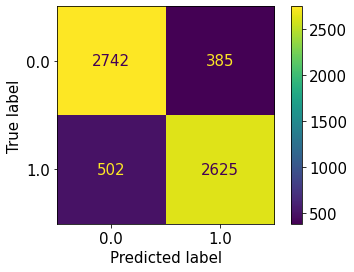

In [29]:
logistic = LogisticRegression(solver='liblinear', penalty='l1').fit(X_train, y_train)
evalution(logistic,X_test,y_test)

ACCURACY SCORE:
0.8738
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86      3127
         1.0       0.82      0.95      0.88      3127

    accuracy                           0.87      6254
   macro avg       0.88      0.87      0.87      6254
weighted avg       0.88      0.87      0.87      6254



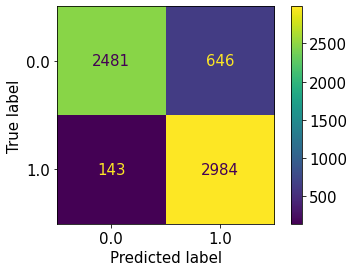

In [42]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
evalution(knn,X_test,y_test)

Epoch 1/20
114/114 [==============================] - 1s 4ms/step - loss: 0.6652 - accuracy: 0.6001
Epoch 2/20
114/114 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.6906
Epoch 3/20
114/114 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7265
Epoch 4/20
114/114 [==============================] - 0s 4ms/step - loss: 0.5044 - accuracy: 0.7531: 0s - loss: 0.5146 - accuracy
Epoch 5/20
114/114 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.7732
Epoch 6/20
114/114 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.7947
Epoch 7/20
114/114 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.8059
Epoch 8/20
114/114 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8189
Epoch 9/20
114/114 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8281
Epoch 10/20
114/114 [==============================] - 0s 2ms/step - l

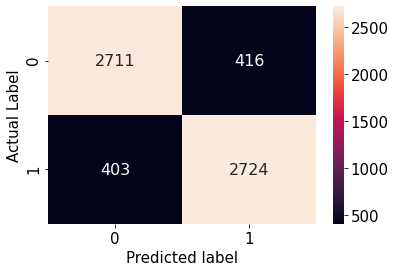

ACCURACY SCORE:
0.8690
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      3127
         1.0       0.87      0.87      0.87      3127

    accuracy                           0.87      6254
   macro avg       0.87      0.87      0.87      6254
weighted avg       0.87      0.87      0.87      6254



In [71]:
model = Sequential()
model.add(Dense(12, activation='relu', autocast = False))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128)
y_pred = np.where(model.predict(X_test)>0.5, 1, 0)
evalution(y_test,y_pred)